In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import completions_module as cmodule

In [2]:
# ---- 

# ucar list
all_files = glob.glob("../data/completions_*.csv")
all_files = sorted(all_files)
df_ucar = cmodule.open_and_concat(all_files)

# ---- 

# hsi list
all_files = glob.glob("../data/hsi_completions_*.csv")
all_files = sorted(all_files)
df_hsis = cmodule.open_and_concat(all_files)

# ---- 

# ehi list
all_files = glob.glob("../data/emerginghsi_completions_*.csv")
all_files = sorted(all_files)
df_ehis = cmodule.open_and_concat(all_files)

# ---- 

all_unis = pd.concat([df_ucar, df_hsis, df_ehis])

# ---- 

df = cmodule.bs_degrees(all_unis)
df = cmodule.atmospheric_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_atm_bs = df

# ---- 

df = cmodule.ms_degrees(all_unis)
df = cmodule.atmospheric_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_atm_ms = df

# ---- 

df = cmodule.phd_degrees(all_unis)
df = cmodule.atmospheric_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_atm_dr = df

# ---- 

df = cmodule.bs_degrees(all_unis)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_eas_bs = df

# ---- 

df = cmodule.ms_degrees(all_unis)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_eas_ms = df

# ---- 

df = cmodule.phd_degrees(all_unis)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_unis_trend_eas_dr = df

# ---- 

In [3]:
hsi = pd.read_excel('../data/HACU-2019-20-Hispanic-Serving-Institutions.xlsx', 
                    engine='openpyxl')
hsi_uni_list = hsi['Name'].unique()

ehi = pd.read_excel('../data/HACU-2019-20-Emerging-Hispanic-Institutions.xlsx', 
                    engine='openpyxl')
ehi_uni_list = ehi['Name'].unique()

all_files = glob.glob("../data/completions_*.csv")
all_files = sorted(all_files)
df = cmodule.open_and_concat(all_files)
ucar_uni_list = df['institution name'].unique()

# ucar list
all_files = glob.glob("../data/completions_*.csv")
all_files = sorted(all_files)
df_ucar = cmodule.open_and_concat(all_files)

# hsi list
all_files = glob.glob("../data/hsi_completions_*.csv")
all_files = sorted(all_files)
df_hsis = cmodule.open_and_concat(all_files)

# ehi list
all_files = glob.glob("../data/emerginghsi_completions_*.csv")
all_files = sorted(all_files)
df_ehis = cmodule.open_and_concat(all_files)

df_ehis = pd.concat([df_ehis, df_ucar[np.isin(df_ucar['institution name'],ehi_uni_list[np.isin(ehi_uni_list, ucar_uni_list)])]])
df_hsis = pd.concat([df_hsis, df_ucar[np.isin(df_ucar['institution name'],hsi_uni_list[np.isin(hsi_uni_list, ucar_uni_list)])]])
df_ucar = df_ucar[(~np.isin(df_ucar['institution name'],ehi_uni_list))&(~np.isin(df_ucar['institution name'],hsi_uni_list))]

In [4]:
# ---- Non-HSI/EHI

df = cmodule.bs_degrees(df_ucar)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_ucar_trend_eas_bs = df

# ---- HSI

df = cmodule.bs_degrees(df_hsis)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_hsis_trend_eas_bs = df

# ---- EHI

df = cmodule.bs_degrees(df_ehis)
df = cmodule.earth_and_atmos_sciences(df)
df = df.groupby('year').sum()[['Grand total','Hispanic or Latino total','Hispanic or Latino women',
                               'Grand total women','Hispanic or Latino men','Grand total men']]
df['hisp_percent_total'] = np.around((df['Hispanic or Latino total'] / df['Grand total'])       * 100, 1)
df['whis_percent_total'] = np.around((df['Hispanic or Latino women'] / df['Grand total women']) * 100, 1)
df['mhis_percent_total'] = np.around((df['Hispanic or Latino men']   / df['Grand total men'])   * 100, 1)
df_ehis_trend_eas_bs = df

# ----

In [5]:
years_array = np.arange(2009,2020,1)

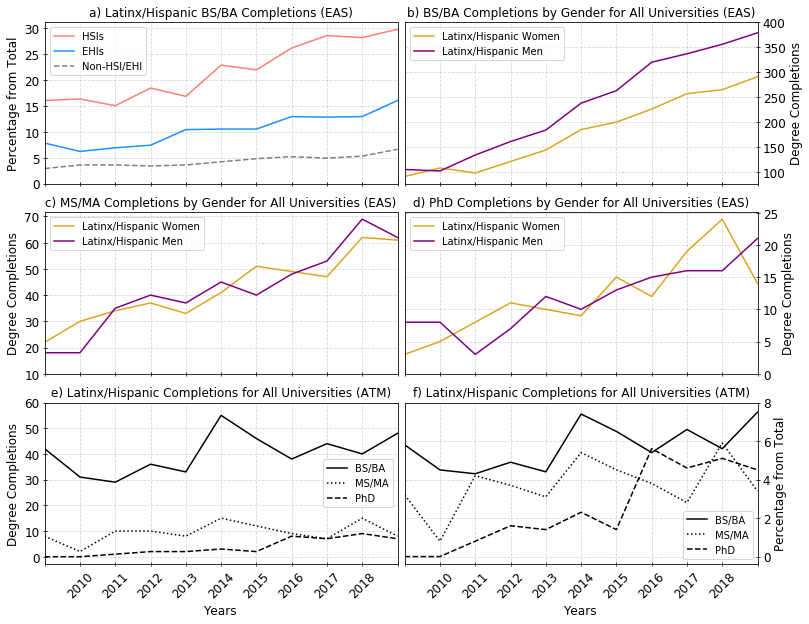

In [6]:
#-----------------------%

fig = plt.figure(figsize=(10.,8.))

#-----------------------%

ax1 = fig.add_axes([0.0, 0.66, 0.49, 0.28])
ax1.set_title('a) Latinx/Hispanic BS/BA Completions (EAS)',
              fontsize=12)

hsis1, = ax1.plot(years_array, df_hsis_trend_eas_bs['hisp_percent_total'].values, c='salmon')
ehis1, = ax1.plot(years_array, df_ehis_trend_eas_bs['hisp_percent_total'].values, c='dodgerblue')
ucar1, = ax1.plot(years_array, df_ucar_trend_eas_bs['hisp_percent_total'].values, c='grey', ls='--')

ax1.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax1.set_ylabel('Percentage from Total',fontsize=12)

ax1.set_yticks([0,5,10,15,20,25,30])
ax1.set_yticklabels([0,5,10,15,20,25,30],fontsize=12)

ax1.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

ax1.margins(x=0)
ax1.grid(alpha=0.5,ls='--')
ax1.legend([hsis1,ehis1,ucar1],['HSIs','EHIs','Non-HSI/EHI'])

#-----------------------%

ax2 = fig.add_axes([0.5, 0.66, 0.49, 0.28])
ax2.set_title('b) BS/BA Completions by Gender for All Universities (EAS)',
              fontsize=12)

ls1, = ax2.plot(years_array, df_unis_trend_eas_bs['Hispanic or Latino women'].values, c='goldenrod', ls='-')
ls2, = ax2.plot(years_array, df_unis_trend_eas_bs['Hispanic or Latino men'].values, c='purple', ls='-')

ax2.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax2.set_ylabel('Degree Completions',fontsize=12)
ax2.yaxis.set_label_position("right")

ax2.set_yticks([100,150,200,250,300,350,400])
ax2.set_yticklabels([100,150,200,250,300,350,400],fontsize=12)

ax2.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

ax2.margins(x=0)
ax2.grid(alpha=0.5,ls='--')
ax2.legend([ls1,ls2],['Latinx/Hispanic Women','Latinx/Hispanic Men'])

#-----------------------%

ax3 = fig.add_axes([0.0, 0.33, 0.49, 0.28])
ax3.set_title('c) MS/MA Completions by Gender for All Universities (EAS)',
              fontsize=12)

ls1, = ax3.plot(years_array, df_unis_trend_eas_ms['Hispanic or Latino women'].values, c='goldenrod', ls='-')
ls2, = ax3.plot(years_array, df_unis_trend_eas_ms['Hispanic or Latino men'].values, c='purple', ls='-')

ax3.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax3.set_ylabel('Degree Completions',fontsize=12)

ax3.set_yticks([10,20,30,40,50,60,70])
ax3.set_yticklabels([10,20,30,40,50,60,70],fontsize=12)

ax3.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

ax3.margins(x=0)
ax3.grid(alpha=0.5,ls='--')
ax3.legend([ls1,ls2],['Latinx/Hispanic Women','Latinx/Hispanic Men'])

#-----------------------%

ax4 = fig.add_axes([0.5, 0.33, 0.49, 0.28])
ax4.set_title('d) PhD Completions by Gender for All Universities (EAS)',
              fontsize=12)

ls1, = ax4.plot(years_array, df_unis_trend_eas_dr['Hispanic or Latino women'].values, c='goldenrod', ls='-')
ls2, = ax4.plot(years_array, df_unis_trend_eas_dr['Hispanic or Latino men'].values, c='purple', ls='-')

ax4.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax4.set_ylabel('Degree Completions',fontsize=12)
ax4.yaxis.set_label_position("right")

ax4.set_yticks([0,5,10,15,20,25])
ax4.set_yticklabels([0,5,10,15,20,25],fontsize=12)

ax4.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

ax4.margins(x=0)
ax4.grid(alpha=0.5,ls='--')
ax4.legend([ls1,ls2],['Latinx/Hispanic Women','Latinx/Hispanic Men'])

#-----------------------%

ax5 = fig.add_axes([0.0, 0., 0.49, 0.28])
ax5.set_title('e) Latinx/Hispanic Completions for All Universities (ATM)',
              fontsize=12)

ls1, = ax5.plot(years_array, df_unis_trend_atm_bs['Hispanic or Latino total'].values, c='k', ls='-')
ls2, = ax5.plot(years_array, df_unis_trend_atm_ms['Hispanic or Latino total'].values, c='k', ls=':')
ls3, = ax5.plot(years_array, df_unis_trend_atm_dr['Hispanic or Latino total'].values, c='k', ls='--')

ax5.tick_params(axis='both',direction='inout',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax5.set_ylabel('Degree Completions',fontsize=12)
ax5.set_xlabel('Years',fontsize=12)

ax5.set_yticks([0,10,20,30,40,50,60])
ax5.set_yticklabels([0,10,20,30,40,50,60],fontsize=12)

ax5.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax5.set_xticklabels(['',2010,2011,2012,2013,2014,2015,2016,2017,2018,''],fontsize=12,rotation=45)

ax5.margins(x=0)
ax5.grid(alpha=0.5,ls='--')
ax5.legend([ls1,ls2,ls3],['BS/BA','MS/MA','PhD'])

#-----------------------%

ax6 = fig.add_axes([0.5, 0., 0.49, 0.28])
ax6.set_title('f) Latinx/Hispanic Completions for All Universities (ATM)',
              fontsize=12)

ls1, = ax6.plot(years_array, df_unis_trend_atm_bs['hisp_percent_total'].values, c='k', ls='-')
ls2, = ax6.plot(years_array, df_unis_trend_atm_ms['hisp_percent_total'].values, c='k', ls=':')
ls3, = ax6.plot(years_array, df_unis_trend_atm_dr['hisp_percent_total'].values, c='k', ls='--')

ax6.tick_params(axis='both',direction='inout',
                labelbottom=True, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax6.set_ylabel('Percentage from Total',fontsize=12)
ax6.yaxis.set_label_position("right")
ax6.set_xlabel('Years',fontsize=12)

ax6.set_yticks([0,2,4,6,8])
ax6.set_yticklabels([0,2,4,6,8],fontsize=12)

ax6.set_xticks([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax6.set_xticklabels(['',2010,2011,2012,2013,2014,2015,2016,2017,2018,''],fontsize=12,rotation=45)

ax6.margins(x=0)
ax6.grid(alpha=0.5,ls='--')
ax6.legend([ls1,ls2,ls3],['BS/BA','MS/MA','PhD'])

#-----------------------%

plt.savefig(f"../figures/fig5.png", bbox_inches='tight', dpi=500)
plt.show()

#-----------------------%